In [ ]:
import gdown

gdown.download(id='1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj', output='D:\\Other\\datasets\\')

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [3]:
vocab_size =1000
embedding_dim =16
max_length =120
trunc_type='post'
padding_type='post'
oov_token='<OOV>'
training_portion=0.8

In [4]:
bdir = 'D:\\Other\\datasets\\'
sentences = []
labels = []
print(len(stopwords))

153


In [5]:
with open(bdir+'bbc-text.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        labels.append(row[0])
        sen = " ".join([r for r in row[1].split() if r not in stopwords])
        sentences.append(sen)
print(len(sentences))
print(sentences[0])

2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable sa

In [8]:
train_size = int(len(sentences)*training_portion)
train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [24]:
tokenizer = Tokenizer(oov_token=oov_token, num_words=vocab_size)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type,
                             truncating=trunc_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
200
120
192
120


In [25]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type,
                                  truncating=trunc_type, maxlen=max_length)


print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [26]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))


print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [28]:
num_epochs = 30
history = model.fit(train_padded,
                    training_label_seq,
                    epochs=num_epochs,
                    validation_data=(validation_padded, validation_label_seq),
                    verbose=2)

Epoch 1/30
56/56 - 2s - loss: 1.7567 - accuracy: 0.2270 - val_loss: 1.7162 - val_accuracy: 0.2382
Epoch 2/30
56/56 - 0s - loss: 1.6727 - accuracy: 0.2270 - val_loss: 1.6315 - val_accuracy: 0.2382
Epoch 3/30
56/56 - 0s - loss: 1.5893 - accuracy: 0.3848 - val_loss: 1.5479 - val_accuracy: 0.4225
Epoch 4/30
56/56 - 0s - loss: 1.4856 - accuracy: 0.4506 - val_loss: 1.4321 - val_accuracy: 0.4494
Epoch 5/30
56/56 - 0s - loss: 1.3328 - accuracy: 0.4983 - val_loss: 1.2566 - val_accuracy: 0.5551
Epoch 6/30
56/56 - 0s - loss: 1.1318 - accuracy: 0.6275 - val_loss: 1.0607 - val_accuracy: 0.7483
Epoch 7/30
56/56 - 0s - loss: 0.9263 - accuracy: 0.8242 - val_loss: 0.8710 - val_accuracy: 0.8494
Epoch 8/30
56/56 - 0s - loss: 0.7434 - accuracy: 0.8904 - val_loss: 0.7193 - val_accuracy: 0.8989
Epoch 9/30
56/56 - 0s - loss: 0.5899 - accuracy: 0.9258 - val_loss: 0.5908 - val_accuracy: 0.9034
Epoch 10/30
56/56 - 0s - loss: 0.4668 - accuracy: 0.9393 - val_loss: 0.4935 - val_accuracy: 0.9146
Epoch 11/30
56/56 -

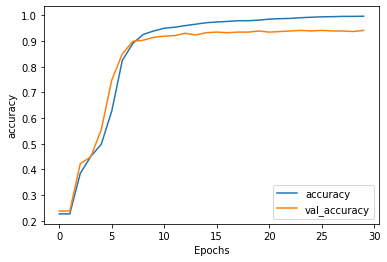

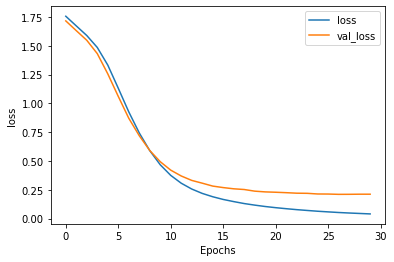

In [29]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [30]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])



In [31]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)
